## EMG2QWERTY Model Performance Analysis: CNN, LSTM, RNN, CNN+LSTM, and GRU

This Jupyter Notebook visualizes and compares the experimental results of various deep learning models—CNN, LSTM, RNN, CNN+LSTM, and GRU—for EMG-based QWERTY typing prediction using the EMG2QWERTY single user dataset.
This notebook includes performance metrics, data tables, visualization to display loss and CER per epoch.

In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
def plot_metrics(csv_file, title=""):
    """
    Reads a CSV file (columns: epoch, loss, CER)
    fills missing CER values, and plots both loss and CER per epoch.
    """

    if not os.path.exists(csv_file):
        print(f"Error: File '{csv_file}' not found.")
        return

    df = pd.read_csv(csv_file)

    df["CER"] = df["CER"].ffill()

    plt.figure(figsize=(10, 5))
    plt.plot(df["epoch"], df["loss"], marker="o", linestyle="-", label="Loss", color="blue")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title} - Loss per Epoch")
    plt.ylim(0, 6)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot CER per Epoch with y-axis from 0 to 100
    plt.figure(figsize=(10, 5))
    plt.plot(df["epoch"], df["CER"], marker="o", linestyle="-", label="CER", color="red")
    plt.xlabel("Epoch")
    plt.ylabel("CER")
    plt.title(f"{title} - CER per Epoch")
    plt.ylim(0, 100)
    plt.legend()
    plt.grid(True)
    plt.show()


In [69]:
def plot_multiple_metrics(csv_files, labels=None, title=""):
    """
    Reads multiple CSV files (columns: epoch, loss, CER)
    fills missing CER values, and plots both loss per epoch and CER per epoch
    """

    if labels is None:
        labels = [f"Model {i+1}" for i in range(len(csv_files))]

    plt.figure(figsize=(10, 5))

    for i, file in enumerate(csv_files):
        if not os.path.exists(file):
            print(f"Error: File '{file}' not found.")
            continue

        df = pd.read_csv(file)
        df["CER"] = df["CER"].ffill()

        plt.plot(df["epoch"], df["loss"], marker="o", linestyle="-", label=labels[i])

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title} Loss per Epoch")
    plt.legend()
    plt.ylim(0, 6)
    plt.grid(True)
    plt.show()

    # Plot CER per Epoch with y-axis from 0 to 100
    plt.figure(figsize=(10, 5))
    for i, file in enumerate(csv_files):
        if not os.path.exists(file):
            continue

        df = pd.read_csv(file)
        df["CER"] = df["CER"].ffill()

        plt.plot(df["epoch"], df["CER"], marker="o", linestyle="-", label=labels[i])

    plt.xlabel("Epoch")
    plt.ylabel("CER")
    plt.title(f"{title} CER per Epoch")
    plt.ylim(0, 100)
    plt.legend()
    plt.grid(True)
    plt.show()


In [70]:
def plot_vertical_bars(csv_files, labels=None, title=""):
    """
    Plots a vertical bar chart comparing the final CER
    """

    if labels is None:
        labels = [f"Model {i+1}" for i in range(len(csv_files))]

    final_cer = []

    for file in csv_files:
        if not os.path.exists(file):
            print(f"Error: File '{file}' not found.")
            continue

        df = pd.read_csv(file)
        df["CER"] = df["CER"].ffill()
        
        last_row = df.iloc[-1]
        final_cer.append(last_row["CER"])

    # Create a bar chart
    x = range(len(final_cer))

    plt.figure(figsize=(8, 5))

    # Plot bars
    bars_cer = plt.bar(x, final_cer, width=0.5, label="Final CER", color="red", alpha=0.7)
    for bar in bars_cer:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f}",
                 ha="center", va="bottom", fontsize=10, color="black")

    plt.xlabel("Model")
    plt.ylabel("CER Value")
    plt.title(title)
    plt.xticks(x, labels)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

In [71]:
def plot_horizontal_bars(csv_file, title="", color="red"):
    """
    Plots a horizontal bar chart comparing the final CER values.
    """
    df = pd.read_csv(csv_file)
    df = df.sort_values(by="CER", ascending=True)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(df["model"], df["CER"], color=color, alpha=0.7)

    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                 f"{bar.get_width():.2f}", ha="left", va="center", fontsize=10, color="black")
    plt.xlabel("CER Value")
    plt.ylabel("Model")
    plt.title(title)
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.show()

In [72]:
def csv_to_datatable(file_path):
    df = pd.read_csv(file_path, na_values=['', ' ', 'NaN'])
    df = df.ffill()
    return df

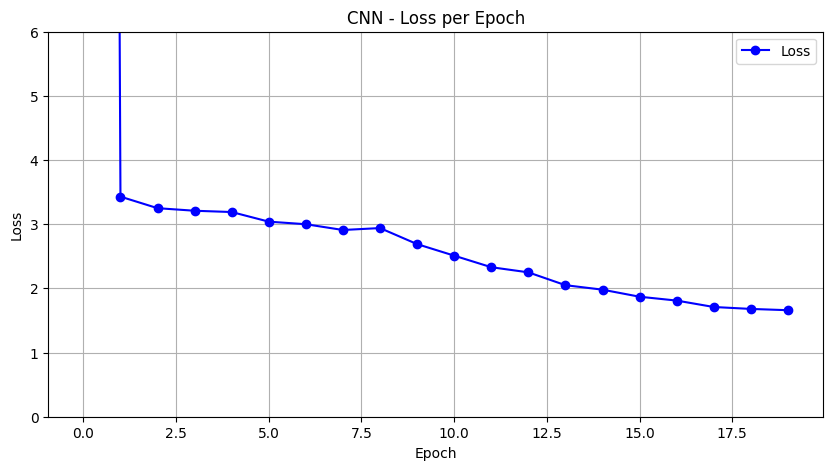

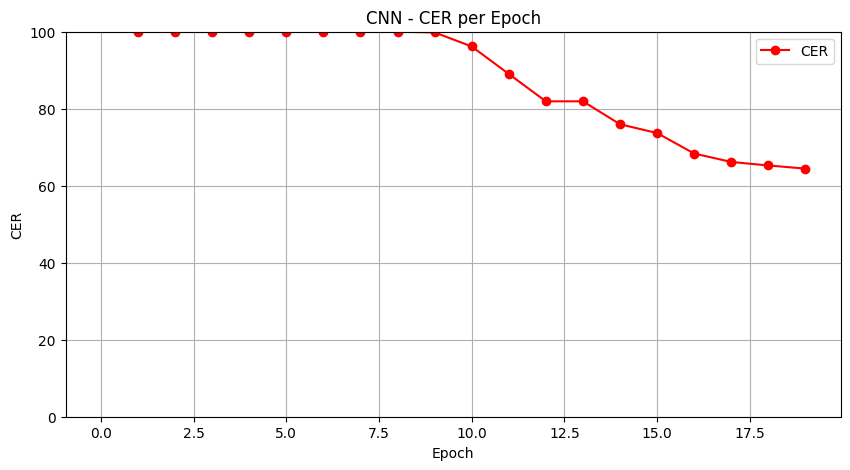

,epoch,loss,CER
0,0,122.00,1358.21887
1,1,3.43,100.00000
2,2,3.25,100.00000
3,3,3.21,100.00000
4,4,3.19,100.00000
5,5,3.04,100.00000
6,6,3.00,100.00000
7,7,2.91,100.00000
8,8,2.94,100.00000
9,9,2.69,99.82278


In [73]:
file = "logs_dataset/cnn.csv"
plot_metrics(file, "CNN")
df = csv_to_datatable(file)
df

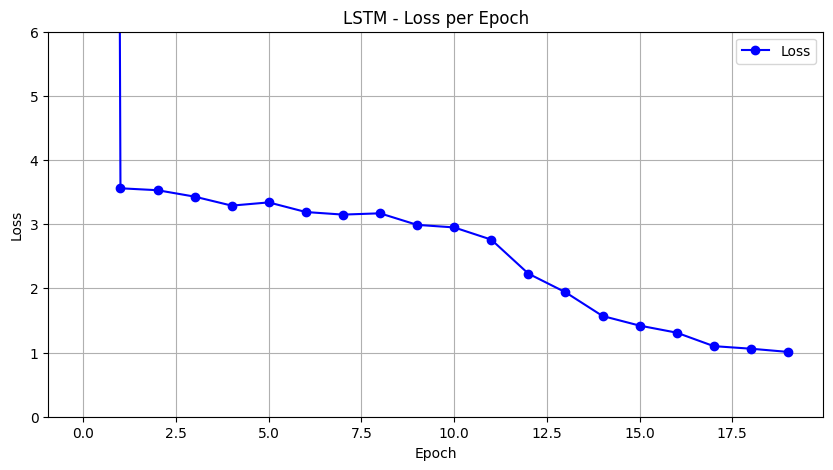

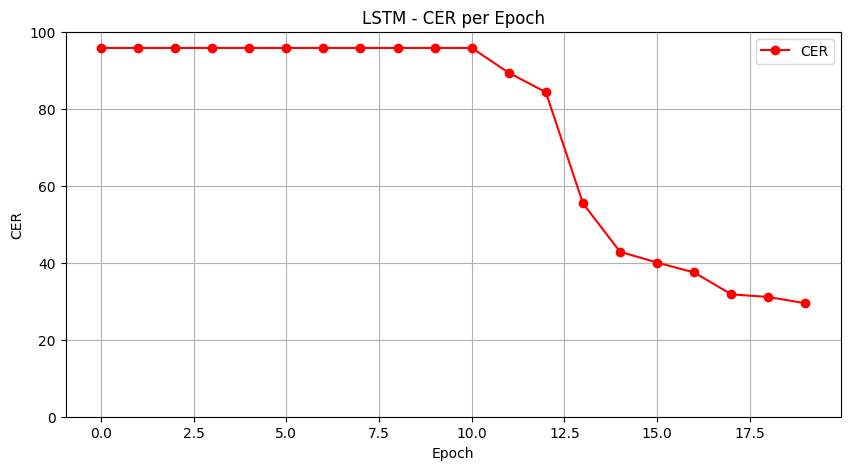

,epoch,loss,CER
0,0,152.00,95.79087
1,1,3.56,95.79087
2,2,3.53,95.79087
3,3,3.43,95.79087
4,4,3.29,95.79087
5,5,3.34,95.79087
6,6,3.19,95.79087
7,7,3.15,95.79087
8,8,3.17,95.79087
9,9,2.99,95.79087


In [74]:
file = "logs_dataset/lstm-512.csv"
plot_metrics(file, "LSTM")
df = csv_to_datatable(file)
df


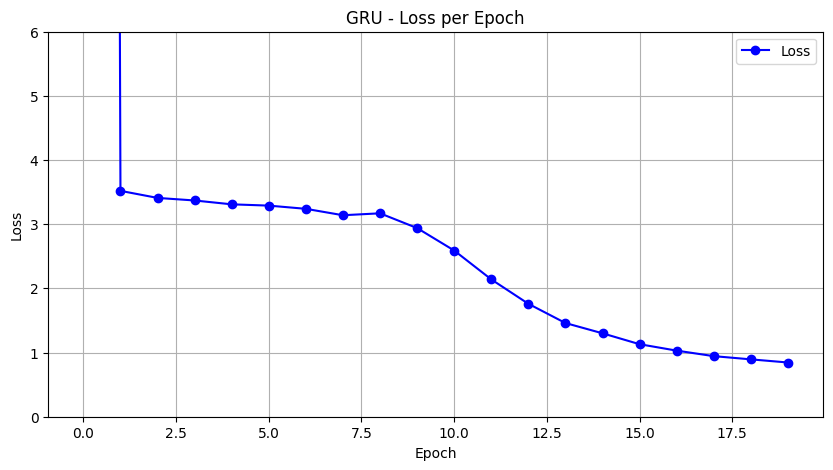

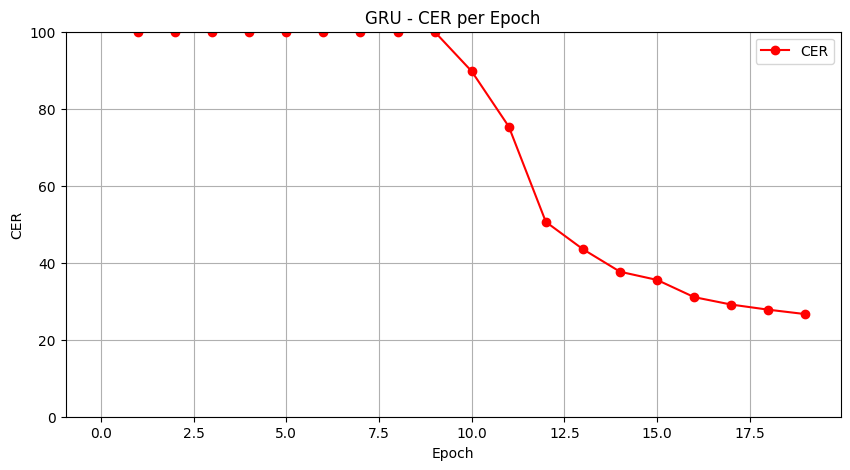

,epoch,loss,CER
0,0,161.000,394.86
1,1,3.520,100.00
2,2,3.410,100.00
3,3,3.370,100.00
4,4,3.310,100.00
5,5,3.290,100.00
6,6,3.240,100.00
7,7,3.140,100.00
8,8,3.170,100.00
9,9,2.940,100.00


In [75]:
file = "logs_dataset/gru-512.csv"
plot_metrics(file, "GRU")
df = csv_to_datatable(file)
df


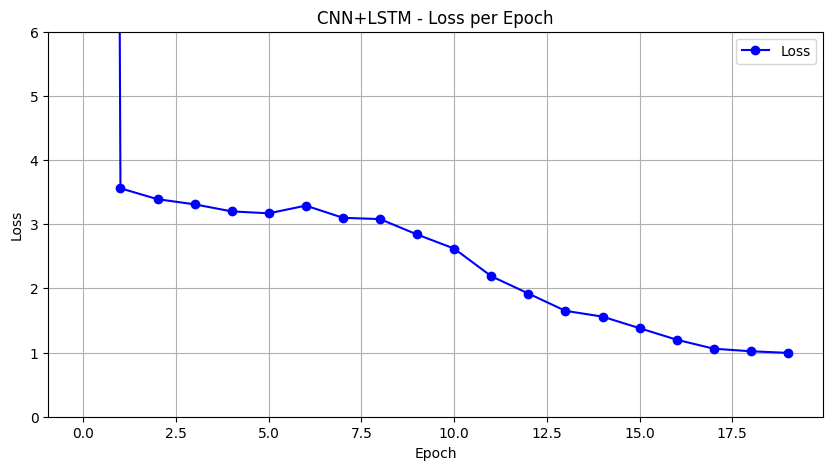

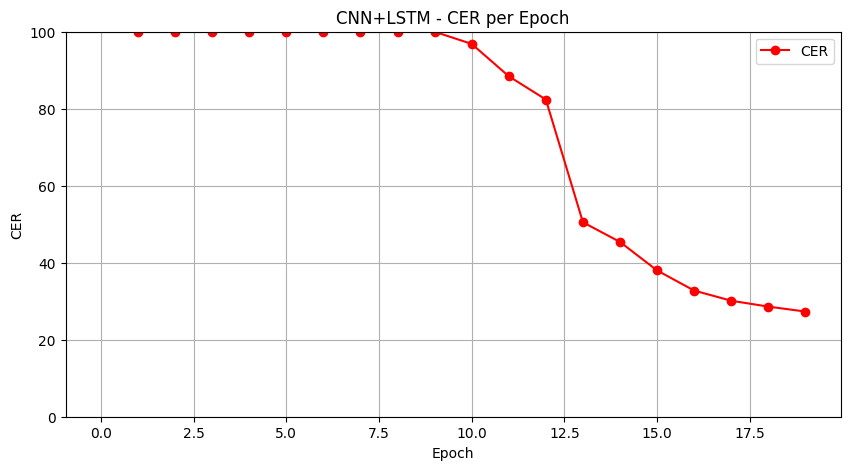

,epoch,loss,CER
0,0,131.000,108.21887
1,1,3.560,100.00000
2,2,3.390,100.00000
3,3,3.310,100.00000
4,4,3.200,100.00000
5,5,3.170,100.00000
6,6,3.290,100.00000
7,7,3.100,100.00000
8,8,3.080,100.00000
9,9,2.840,100.00000


In [76]:
file = "logs_dataset/cnn-lstm-256.csv"
plot_metrics(file, "CNN+LSTM")
df = csv_to_datatable(file)
df

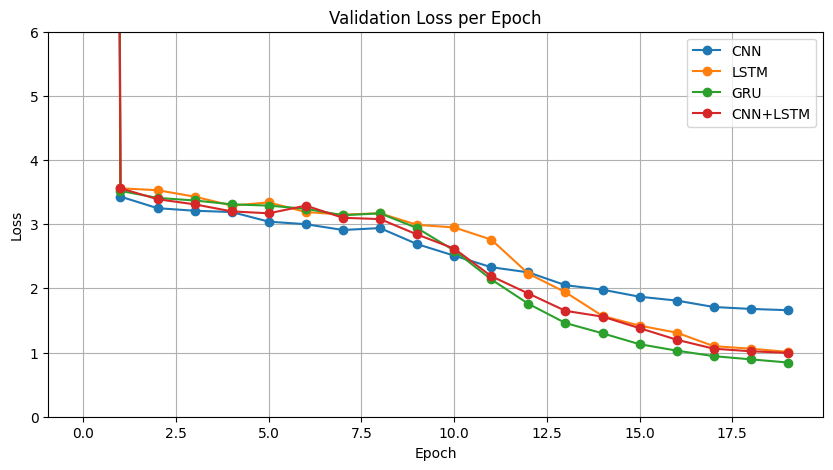

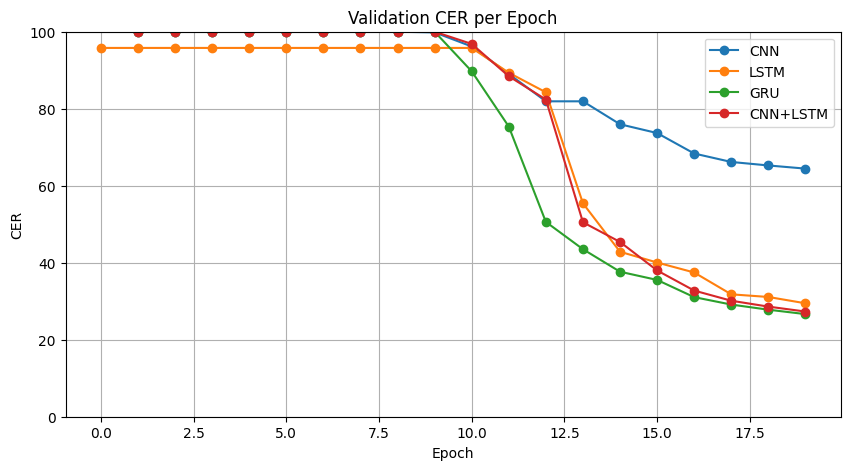

In [77]:
plot_multiple_metrics(
    ["logs_dataset/cnn.csv", "logs_dataset/lstm-512.csv", "logs_dataset/gru-512.csv", "logs_dataset/cnn-lstm-256.csv"], 
    labels=["CNN", "LSTM", "GRU", "CNN+LSTM"], 
    title="Validation"
)

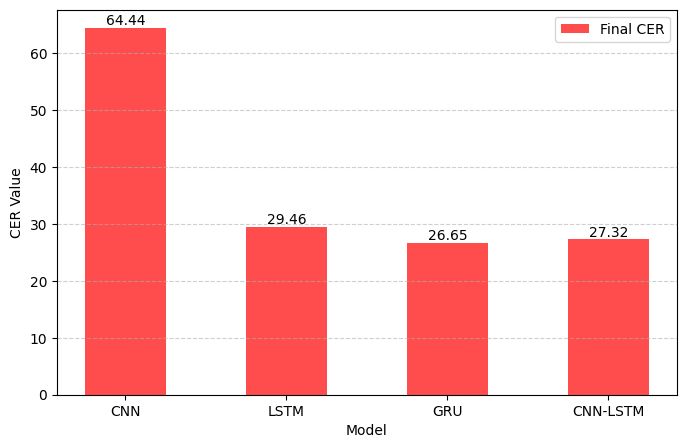

In [78]:
plot_vertical_bars(["logs_dataset/cnn.csv", "logs_dataset/lstm-512.csv", "logs_dataset/gru-512.csv", "logs_dataset/cnn-lstm-256.csv"], labels=["CNN", "LSTM", "GRU", "CNN-LSTM"])

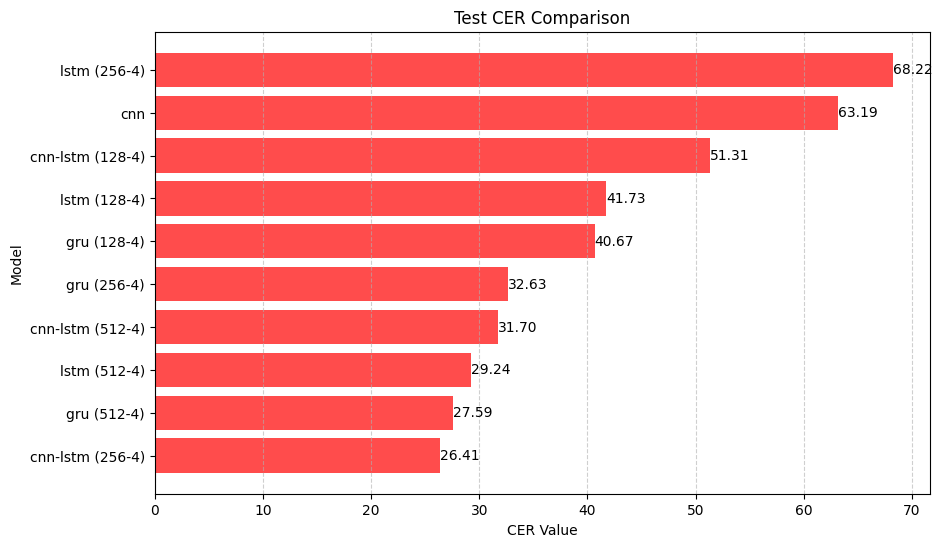

In [79]:
plot_horizontal_bars("logs_dataset/model_test_cer.csv", "Test CER Comparison")

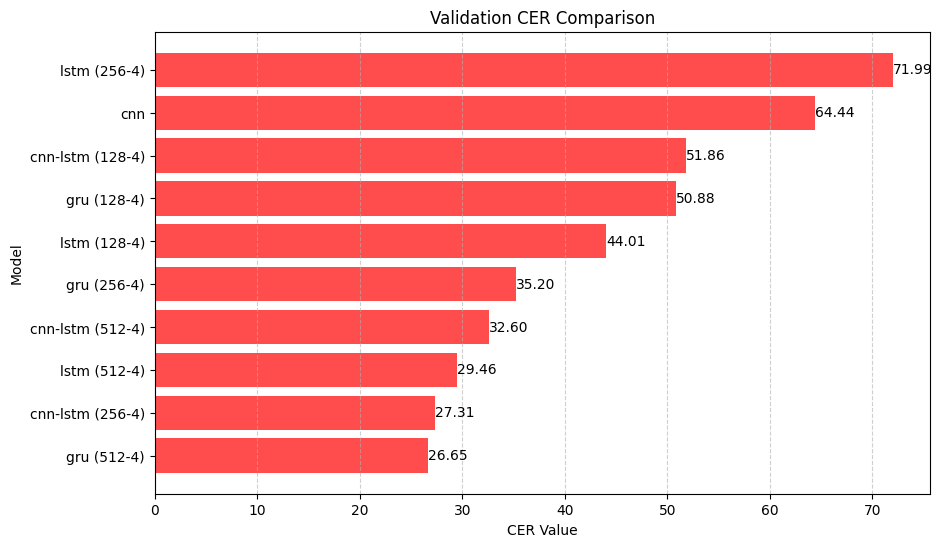

In [80]:
plot_horizontal_bars("logs_dataset/model_val_cer.csv", "Validation CER Comparison")

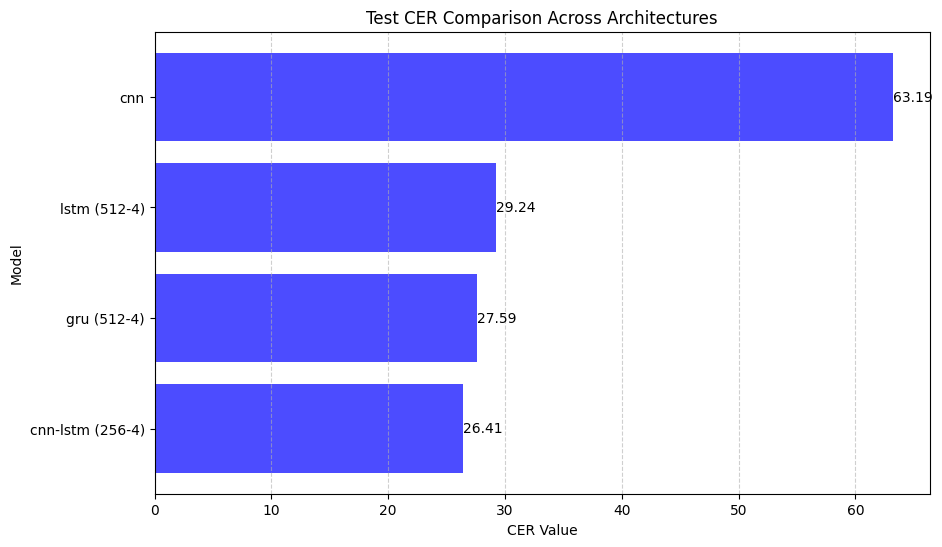

In [81]:
plot_horizontal_bars("logs_dataset/best_model_test_cer.csv", "Test CER Comparison Across Architectures", "blue")